In [1]:
from fastai.vision.all import *

In [2]:
# path to folder with subfolders of each image class
path = '/media/nick/2TB Working 2/Projects/Ranglands ML/Vector data/Training vector data/Inside study area/roads model small'

In [3]:
batch_size = 30
img_size = 500

In [4]:
# setup trasnforms
item_tfms = [Resize(img_size)]
batch_tfms = [Normalize.from_stats(*imagenet_stats),
            *aug_transforms(size=img_size, flip_vert=True,max_rotate=90.0,max_lighting=0.1,max_warp=0)]

In [5]:
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,splitter=RandomSplitter(seed=42),
                                    bs=batch_size,
                                    item_tfms=item_tfms,
                                    batch_tfms=batch_tfms
                                   )

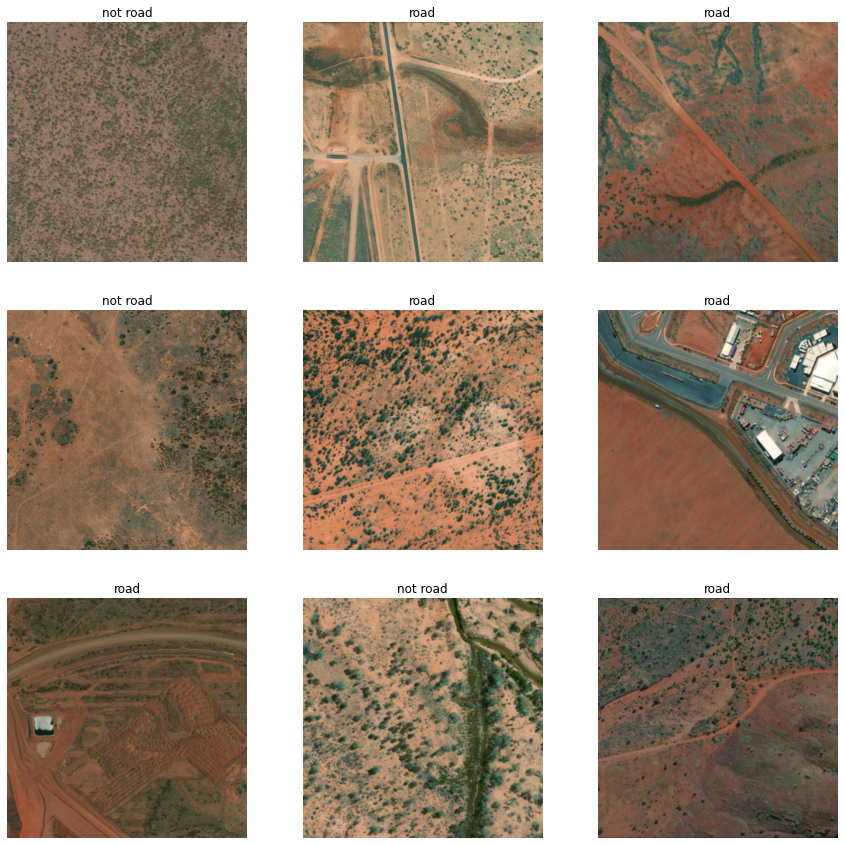

In [6]:
# show some data
data.show_batch(max_n = 9, figsize = (15,15))

In [10]:
np.savetxt(path+"/classes.csv", np.array(data.vocab), fmt='%s')

In [8]:
learn = cnn_learner(data, resnet18, metrics=error_rate).to_fp16()

epoch,train_loss,valid_loss,error_rate,time
0,0.950360,0.757358,0.242049,00:16


Better model found at epoch 0 with error_rate value: 0.242049440741539.


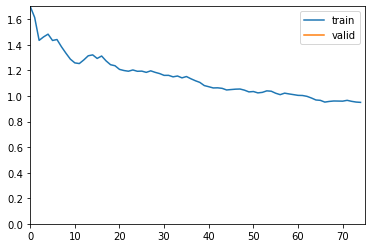

epoch,train_loss,valid_loss,error_rate,time
0,0.649589,0.415147,0.180212,00:19
1,0.562530,0.410512,0.151943,00:19
2,0.465252,0.337361,0.113074,00:19
3,0.375268,0.262551,0.083039,00:19
4,0.309399,0.192102,0.070671,00:20
5,0.269642,0.165582,0.072438,00:19
6,0.231316,0.174466,0.061837,00:19
7,0.209170,0.165813,0.061837,00:19
8,0.182921,0.157181,0.045936,00:19
9,0.178235,0.157409,0.049470,00:19


Better model found at epoch 0 with error_rate value: 0.18021199107170105.


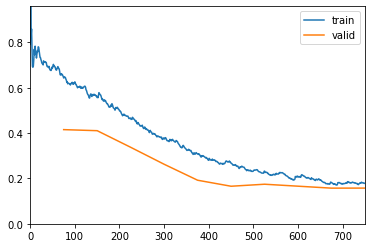

Better model found at epoch 1 with error_rate value: 0.15194344520568848.
Better model found at epoch 2 with error_rate value: 0.1130741760134697.
Better model found at epoch 3 with error_rate value: 0.08303884416818619.
Better model found at epoch 4 with error_rate value: 0.07067135721445084.
Better model found at epoch 6 with error_rate value: 0.06183742359280586.
Better model found at epoch 8 with error_rate value: 0.04593636840581894.


In [9]:
learn.fine_tune(10,cbs = [ShowGraphCallback(),
                         SaveModelCallback(monitor='error_rate',with_opt=True, fname='quick_model')])

In [11]:
# reload the best model
learn.load('quick_model')
learn.export('models/quick_model.pkl')

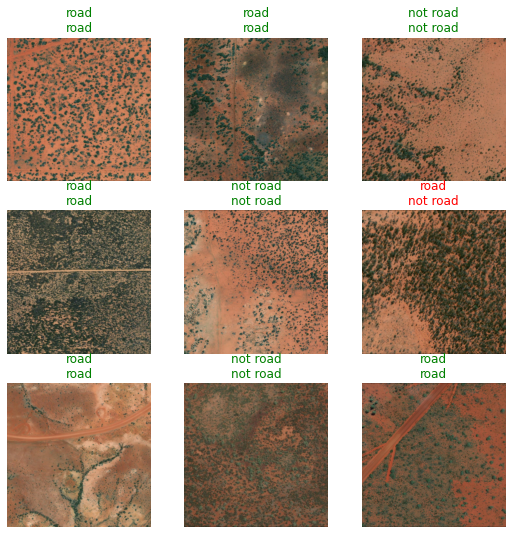

In [12]:
learn.show_results()

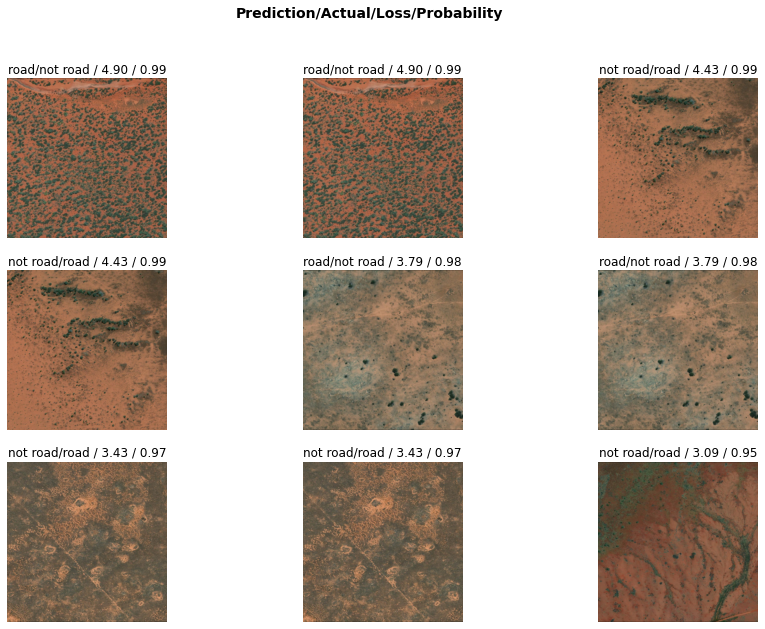

In [13]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

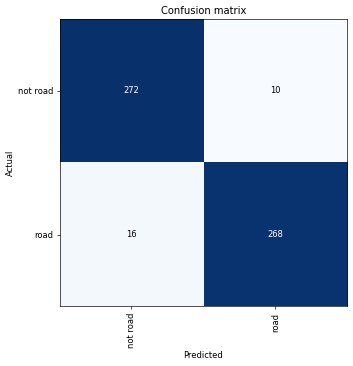

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)